# Titanic

## Descrição dos Dados

In [1695]:
import pandas as pd
import numpy as np


desc = pd.DataFrame({
    "Variável": ["survived", "pclass", 
                 "sex", "Age", "sibsp", 
                 "parch", "ticket", "fare",
                 "cabin", "embarked"],
    
    "Definição": ["Sobrevivência", "Classe do Bilhete", 
                   "Sexo", "Idade", "num. de irmãos / cônjuges",
                   "num. de pais / filhos", "Número do bilhete",
                   "Preço do bilhete", "Número da Cabine", "Porto de Embarcação"],
    
    "Chave": ["0 = Não, 1 = Sim", "1 = 1ª, 2 = 2ª, 3 = 3ª",
            np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan,
            "C = Cherbourg, Q = Queenstown, S = Southampton"]
})

desc.fillna("Sem info")

,Variável,Definição,Chave
0,survived,Sobrevivência,"0 = Não, 1 = Sim"
1,pclass,Classe do Bilhete,"1 = 1ª, 2 = 2ª, 3 = 3ª"
2,sex,Sexo,Sem info
3,Age,Idade,Sem info
4,sibsp,num. de irmãos / cônjuges,Sem info
5,parch,num. de pais / filhos,Sem info
6,ticket,Número do bilhete,Sem info
7,fare,Preço do bilhete,Sem info
8,cabin,Número da Cabine,Sem info
9,embarked,Porto de Embarcação,"C = Cherbourg, Q = Queenstown, S = Southampton"


Neste caso todas as variáveis são explicativas exceto a **survived**, porque é a nossa resposta (target).

## Importar datasets

In [1696]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


### Dataset de Treino

In [1697]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Dataset de Teste

In [1698]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Verificar por dados faltantes
### Via mapa de calor (heatmap)


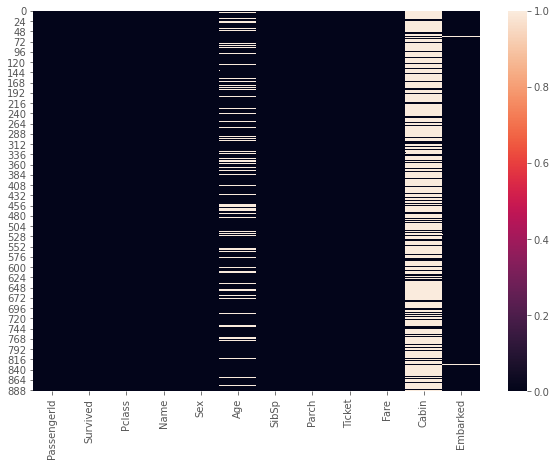

In [1699]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("ggplot")

plt.figure(figsize=(10, 7))
sns.heatmap(df_train.isnull())

No dataset de treino faltam bastantes idades, e assim por alto, esta é uma variável bem importante para tirar conclusões.<br> No caso da variável Cabin, talvez seja interessante imputar(atribuir valores às amostras nulas), porque provavelmente quem tem um bilhete de classe mais alta, deveria ficar nas cabines mais próximas da superficie (logo mais probabilidade de sobreviver?)<br><br> Vamos ver como está o dataset de teste

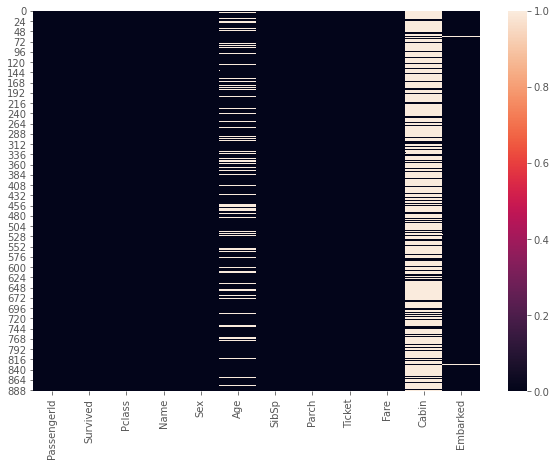

In [1700]:
plt.figure(figsize=(10, 7))
sns.heatmap(df_train.isnull())

A mesma coisa que no dataset de treino

### Via info

In [1701]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Temos 891 entries(amostras).<br> 
* A variável <u>Age(idade)</u> tem apenas dados de 714 amostras, sendo que os restantes são NaN e não faz sentido assumir que significa que a idade é nula.<br>
    * **Observação**: Poderá fazer sentido ter idade nula caso sejam considerados bebés com < de 1 ano.

<br><br>
* Há um variável categórica, <u>Cabin</u>, que só temos informação de 204 amostras. Esta mostra a identificação da cabin onde a amostra ficou, também não faz sentido ser nula, pois todos os passageiros necessitariam de ter uma.

<br><br>
* Por fim, a variável <u>Embarked</u> tem apenas 3 valores faltantes, sendo que esta variável armazena o local onde a amostra embarcou, o valor nulo pode significar que não embarcou ? Ou será apenas uma falha na coleta dos dados?
<br><br>

**Resumidamente**: As variáveis Cabin e Embarked terão os valores nulos preenchidos (seja pela média, moda ou outra técnica aplicada).<br> Já a Idade farei possivelmente 2 testes lá mais à frente: um onde analiso cada caso e atribuo a idade mais correta (com base em amostras idênticas) e outro que é simplesmente deixar a idade como 0. A forma que me faça obter um melhor resultado será a mantida.

# Análise Exploratória

## PClass e Survived
Aqui vamos comparar como a classe do bilhete influência na mortalidade

Text(0, 0.5, 'Sobrevivência')

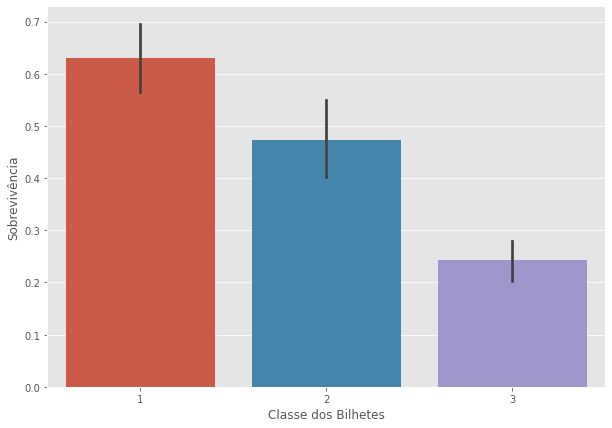

In [1702]:
plt.figure(figsize=(10,7))
sns.barplot(df_train["Pclass"], df_train["Survived"])
plt.xlabel("Classe dos Bilhetes")
plt.ylabel("Sobrevivência")

1 significa **primeira classe**, já que 0 significa <u> não sobreviveu </u> e 1 que <u>sobreviveu</u>, podemos constatar que a 1ª classe teve muito mais sobreviventes ($\approx 0.62 $).<br><br>
A 2ª classe já caiu para $\approx 0.48$ e a 3ª classe é que tem menos sobreviventes, com $\approx 0.25$.
<br><br>
Verifiquemos de forma analítica:

In [1703]:
def survival_ratio(pclass):
    """ Função que calcula a taxa de sobrvivência de cada classe"""
    survived = df_train[ (df_train["Pclass"]==pclass) & (df_train["Survived"]==1)]["Pclass"].count()
    total = df_train[ df_train["Pclass"]==pclass ]["Pclass"].count()
    
    return (survived / total)

In [1704]:
def survival_std(pclass):
    survived_df = df_train[ (df_train["Pclass"]==pclass) & (df_train["Survived"]==1)]["Pclass"]
    mean_survived = survival_ratio(pclass)
    total = df_train[ df_train["Pclass"]==pclass ]["Pclass"].count()
    
    return np.sqrt( (survived_df.iloc[0] - mean_survived)**2 / total)

In [1705]:
print("Média de sobrevivência, 1ª classe: %.2f" % survival_ratio(1))
print("Média de sobrevivência, 2ª classe: %.2f" % survival_ratio(2))
print("Média de sobrevivência, 3ª classe: %.2f" % survival_ratio(3))

Média de sobrevivência, 1ª classe: 0.63
Média de sobrevivência, 2ª classe: 0.47
Média de sobrevivência, 3ª classe: 0.24


In [1706]:
print("Desvio padrão na taxa de sobrevivência, 1ª classe: %.2f" % survival_std(1))
print("Desvio padrão na taxa de sobrevivência, 2ª classe: %.2f" % survival_std(2))
print("Desvio padrão na taxa de sobrevivência, 3ª classe: %.2f" % survival_std(3))

Desvio padrão na taxa de sobrevivência, 1ª classe: 0.03
Desvio padrão na taxa de sobrevivência, 2ª classe: 0.11
Desvio padrão na taxa de sobrevivência, 3ª classe: 0.12


Pode-se confirmar que quanto <u>maior a classe</u> **mais** pessoas **sobrevivem**.<br>
No caso da 1ª classe pode-se ver pelo desvio padrão que a taxa de sobrevivência não foge muito da média (maioria das amostras de 1ª classe sobrevivem). 

## PClass realmente é importante para a conclusão da sobrevivência?

E se fizessemos um teste de hipótese? Em que:<br>
$H_0:$ A classe não importa para a sobrevivência.<br>
$H_1:$ Quanto maior a classe maior a probabilidade de sobreviver.
<br><br>
Portanto $H_0 = 0$ e $H_1 \neq 0$

In [1707]:
# Selecionar 50 samples
import random

first = df_train[ df_train["Pclass"] == 1]
second = df_train[ df_train["Pclass"] == 2]
third = df_train[ df_train["Pclass"] == 3]

print("1ª classe média de sobrevivencia: %.2f" % np.mean(first["Survived"]))
print("3ª classe média de sobrevivencia: %.2f" % np.mean(third["Survived"]))

1ª classe média de sobrevivencia: 0.63
3ª classe média de sobrevivencia: 0.24


In [1708]:
#from scipy.stats import ttest_ind
from statsmodels.stats.weightstats import ttest_ind

tset, pval, deg_freedom = ttest_ind(first["Survived"].values, third["Survived"].values)

print("Valor P: %E" % pval)
print("T-statistic: %.3f" % tset)

Valor P: 1.480396E-24
T-statistic: 10.624


In [1709]:
df_train["Survived"].corr(df_train["Pclass"], method="spearman")

-0.33966793665005257

O nosso `ttest_ind` comparou as médias de sobreviência da 1ª classe, $\approx 0.64$ (classe mais alta) e da 3ª classe, $\approx 0.24$ (classe mais baixa). E pudemos observar que o valor-p é extremamente baixo, fazendo-nos rejeitar a $H_0$: A classe não importa para a sobrevivência.<br> E aceitar que faz diferença sim!<br><br>
A correlação mostra que há alguma dependência sim (de forma negativa, ou seja, descrescem ambas), mas não tão forte quanto a diferença nas médias vistas acima.

In [1710]:
df_train["Pclass_inv"] = df_train["Pclass"].apply(lambda x: 1 if x == 3 else ( 3 if x == 1 else 2))
df_train["Survived"].corr(df_train["Pclass_inv"], method="spearman")

0.33966793665005257

Isto é novamente a correlação! Contudo eu troquei as classes para uma ordem que faz mais sentido matematicamente em que 1 é a classe mais baixa e 3 a mais alta.<br>
Assim podemos observar que à medida que a classe aumenta (aumentando o nível da classe) a taxa de sobrevivência aumentará também! Dessa forma faz mais sentido para nós (ou para mim).

In [1711]:
df_train.drop(["Pclass_inv"], axis=1, inplace=True)

## PClass e Sexo

Verificar qual a classe mais abundante em cada sexo.

Text(0, 0.5, 'Classe')

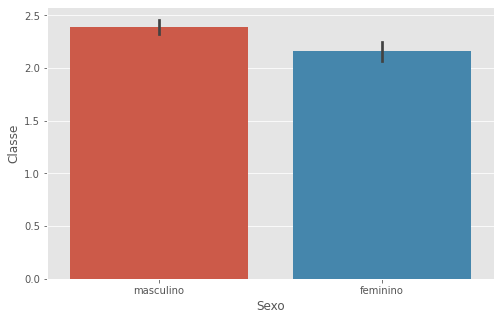

In [1712]:
plt.figure(figsize=(8,5))
sns.barplot(x="Sex", y="Pclass",
            data=df_train.replace(
                {"Sex": {"male": "masculino",
                         "female": "feminino"}}
            )
           )
plt.xlabel("Sexo")
plt.ylabel("Classe")

In [1713]:
print("Média da classe nas pessoas de sexo masculino: %.3f" % 
      df_train[ df_train["Sex"] == "male"]["Pclass"].mean())

print("Média da classe nas pessoas de sexo feminino: %.3f\n" % 
      df_train[ df_train["Sex"] == "female"]["Pclass"].mean())

Média da classe nas pessoas de sexo masculino: 2.390
Média da classe nas pessoas de sexo feminino: 2.159



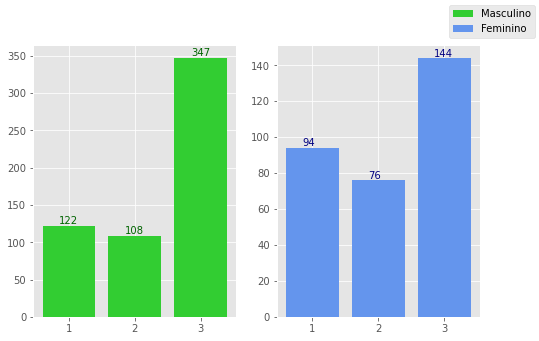

In [1714]:
fig, ax= plt.subplots(1,2, figsize=(8,5))
class_males = []
class_females = []

# Separar masculino e feminino por classes
for i in range(1,4):
    class_males.append( df_train[(df_train["Sex"]== "male") & 
                                 (df_train["Pclass"]==i)]["Pclass"].count() )
    
    class_females.append( df_train[(df_train["Sex"]== "female") & 
                                 (df_train["Pclass"]==i)]["Pclass"].count() )


# Variável com as classes únicas
classes = np.sort(df_train["Pclass"].unique())
    
# Criar gráfico Contagem em função da classe
ax[0].bar(x= classes, height=class_males,
          label="Masculino", color="limegreen")

ax[1].bar(x=classes, height=class_females,
          label="Feminino", color="cornflowerblue")


# Colocar valores por cima das barras (contagem de sexo masculino e feminio, por classes)
for i, v in enumerate(class_males):
    ax[0].text(classes[i] - .15, v+3, str(v), color='darkgreen')

for i, v in enumerate(class_females):
    ax[1].text(classes[i] - .15, v+1, str(v), color='navy')

fig.legend()

In [1715]:
num_male = sum(class_males)
num_female = sum(class_females)

print("Número de pessoas de sexo masculino: %d" % num_male)
print("Número de pessoas de sexo feminino: %d\n" % num_female)


print("Sexo masculino 1ª classe: %d-%d%%" % (class_males[0], (class_males[0]/num_male)*100))
print("Sexo masculino 2ª classe: %d-%d%%" % (class_males[1], (class_males[1]/num_male)*100))
print("Sexo masculino 3ª classe: %d-%d%%\n" % (class_males[2], (class_males[2]/num_male)*100))

print("Sexo feminino 1ª classe: %d-%d%%" % (class_females[0], (class_females[0]/num_female)*100))
print("Sexo feminino 2ª classe: %d-%d%%" % (class_females[1], (class_females[1]/num_female)*100))
print("Sexo feminino 3ª classe: %d-%d%%" % (class_females[2], (class_females[2]/num_female)*100))

Número de pessoas de sexo masculino: 577
Número de pessoas de sexo feminino: 314

Sexo masculino 1ª classe: 122-21%
Sexo masculino 2ª classe: 108-18%
Sexo masculino 3ª classe: 347-60%

Sexo feminino 1ª classe: 94-29%
Sexo feminino 2ª classe: 76-24%
Sexo feminino 3ª classe: 144-45%


Há 263 pessoas do sexo masculino a mais que pessoas do sexo feminino. No entanto o padrão mantém-se:
* Grande maioria pertence à 3ª classe
* Há sempre um pouco mais na 1ª classe comparativamente à 2ª classe

In [1716]:
# Converter os sexos feminino e masculino para 1 e 0
for df in [df_train, df_test]:
    df["Sex"] = df["Sex"].apply(lambda x: 1 if x == "female" else 0)

print("Correlação entre Classe e Sexo: %.3f" % df_train["Pclass"].corr(df_train["Sex"]))

Correlação entre Classe e Sexo: -0.132


Correlação pequena entre ambos, em conjunto ao que observarmos acima, podemos concluir que ambos são independentes um do outro.

## PClass e SibSp
Vamos ver que relação há entre a classe da amostra e o número de irmãos/cônjugues

In [1717]:
df_train.groupby("Pclass")["SibSp"].apply(lambda x: x.value_counts())

Pclass   
1       0    137
        1     71
        2      5
        3      3
2       0    120
        1     55
        2      8
        3      1
3       0    351
        1     83
        4     18
        2     15
        3     12
        8      7
        5      5
Name: SibSp, dtype: int64

In [1718]:
df_train["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

1ª Classe - 216 pessoas onde 137 foram sem qualquer irmã(o)/cônjugue<br>
2ª Classe - 184 pessoas onde 120 foram sem qualquer irmã(o)/cônjugue<br>
3ª Classe - 491 pessoas onde 351 foram sem qualquer irmã(o)/cônjugue<br>
<br><br>
Bem podemos ver que maioria das pessoas de cada classe não vai acompanhado por um(a) companheiro(a) ou então por um irmão/irmã.<br>

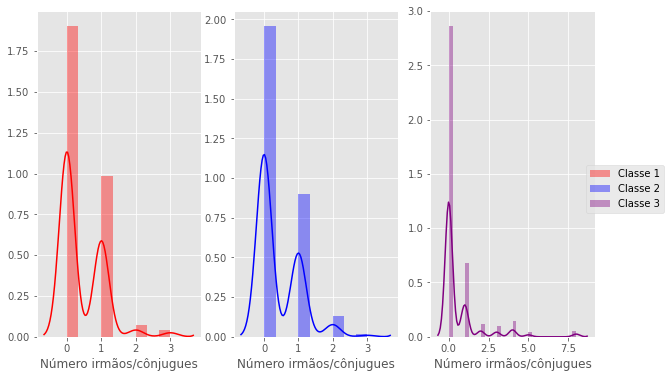

In [1719]:
fig, ax = plt.subplots(1,3, figsize=(10,6))

sns.distplot(df_train[df_train["Pclass"]==1]["SibSp"], ax=ax[0], color="red", label="Classe 1")
sns.distplot(df_train[df_train["Pclass"]==2]["SibSp"], ax=ax[1], color="blue", label="Classe 2")
sns.distplot(df_train[df_train["Pclass"]==3]["SibSp"], ax=ax[2], color="purple", label="Classe 3")

fig.legend(loc="center right")

# Mudar os labels do eixo x
for i in range(len(ax)):
    ax[i].xaxis.label.set_text("Número irmãos/cônjugues")


O gráfico comprova o que disse! A esmagadora maioria vai "sozinho". No entanto podemos reparar que a classe mais baixa tem algumas amostras a levar mais de 3 irmãos/cônjugues (até 8).<br>
Podemos pensar que a 3ª classe é mais económica, logo seria uma boa opção para aqueles que não tivessem tantas posses. E em 1912 métodos contraceptivos deveria ser algo escasso e, provavelmente, só pessoas com mais capacidades monetárias teriam esse privilégio. Assim podemos concluir que era comum as famílias carenciadas terem mais filhos, por isso o número de irmãos/cônjugues seja superior na 3ª classe.  

In [1720]:
print("Correlação entre Classe e Sexo: %.3f" % df_train["Pclass"].corr(df_train["SibSp"]))

Correlação entre Classe e Sexo: 0.083


Como seria de esperar não há qualquer dependência entre estas variáveis

## Pclass e Parch

Vamos verificar a relação que há entre as classes e as amostras terem pais/filhos abordo

c:\users\tigax\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
c:\users\tigax\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


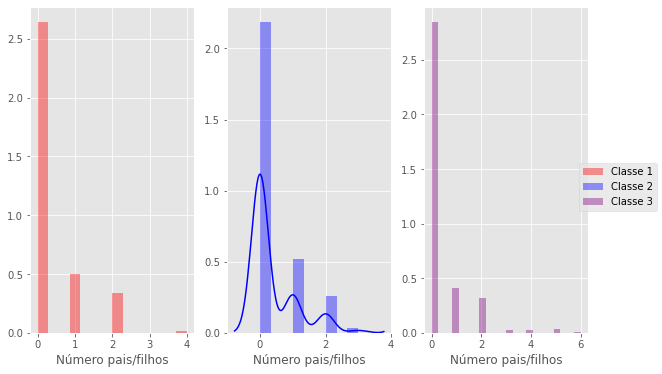

In [1721]:
fig, ax = plt.subplots(1,3, figsize=(10,6))

sns.distplot(df_train[df_train["Pclass"]==1]["Parch"], ax=ax[0], color="red", label="Classe 1")
sns.distplot(df_train[df_train["Pclass"]==2]["Parch"], ax=ax[1], color="blue", label="Classe 2")
sns.distplot(df_train[df_train["Pclass"]==3]["Parch"], ax=ax[2], color="purple", label="Classe 3")

fig.legend(loc="center right")

# Mudar os labels do eixo x
for i in range(len(ax)):
    ax[i].xaxis.label.set_text("Número pais/filhos")

Podiamos fazer mais testes, mas não me pareça que seja um variável interessante testar com as classes.<<br>
Simplesmente podemos ver que é bem idêntico ao número de irmãos/cônjugues, onde a esmagadora maioria em ambas as classes, vão sem pais e/ou filhos.

In [1722]:
print("Correlação entre Classe e Sexo: %.3f" % df_train["Pclass"].corr(df_train["Parch"]))

Correlação entre Classe e Sexo: 0.018


E a correlação é igualmente "nula", basicamente não há dependência entre a classe de uma amostra e o número de filhos/pais que levam a bordo

# Pausa para transformar dados
Bem todas as variáveis quantitativas e que estão completas (sem valores faltantes) já foram testadas em relação ao Pclass.<br>
Portanto agora temos de transformar as variáveis categóricas/qualitativas e também imputar valores.

## Imputar Idades

Temos 714 idades, ou seja, 177 idades faltantes. Vamos analisar as amostras que têm idades em falta.

In [1723]:
df_train[df_train["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",0,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",0,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",0,NaN,0,0,349217,7.8958,NaN,S


### Classes e Idades

In [1724]:
print("Correlação entre as classes e as idades: %.3f" % df_train["Pclass"].corr(df_train["Age"]))

Correlação entre as classes e as idades: -0.369


Ok, temos alguma correlação entre a classe e as idades. Aqui temos de entender o porquê de ser negativo.<br>

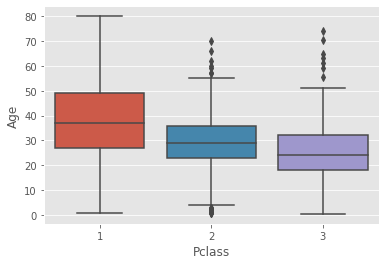

In [1725]:
sns.boxplot(df_train["Pclass"], df_train["Age"])

Os interquartis(Q1 ao Q3) têm a grande concentração de amostras. Portanto 1ª classe 29-48 anos; 2ª classe 23-35 anos; 3ª classe 19-31 anos.<br>
Encontrámos o padrão e dá para ver o porquê de ser uma correlação negativa. Se olharmos para as boxplots a primeira é a mais alta, a do meio baixou um pouquinho e a última é a mais baixa, ou seja, se traçássemos uma reta pelas boxplots teriamos um declive negativo<br>
Os valores das idades vão baixando consoante a classe

### Irmãos/Cônjugues e Idades

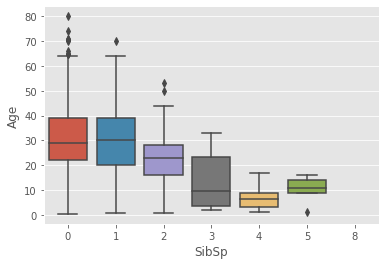

In [1726]:
sns.boxplot(df_train["SibSp"], df_train["Age"])

In [1727]:
print("Correlação entre os irmãos/cônjugues e as idades: %.3f" % df_train["SibSp"].corr(df_train["Age"]))

Correlação entre os irmãos/cônjugues e as idades: -0.308


Novamente correlação negativa (idêntica às classes):<br>
0  irmãos/cônjugues - 22 a 40 anos<br>
1  irmãos/cônjugues - 20 a 40 anos<br>
2  irmãos/cônjugues - 16 a 37 anos<br>
3  irmãos/cônjugues - 3 a 22 anos<br>
4  irmãos/cônjugues - 5 a 9 anos<br>
5  irmãos/cônjugues - 10 a 15 anos<br>

Já se vai perceber porque estou a fazer esta análise, tudo para imputar dados com uma precisão razoável.

Vamos criar grupos de idades com base nas classes e irmãos/cônjugues:<br>
* Irmãos/Cônjugues:
    * Grupo 1 - 20 aos 40 anos
    * Grupo 2 - 10 aos 19 anos
    * Grupo 3 - 3 aos 9 anos
* Classes:
    * Grupo 1 - 29 aos 48 anos
    * Grupo 2 - 23 aos 35 anos
    * Grupo 3 - 19 aos 31 anos
    
Com estes 2 grupos podemos criar um grupo total de certa forma.
* Grupo 1 - >= 35 anos -> Classe 1 e tem 0 ou 1 irmãos/cônjugues
* Grupo 2 - >= 25 e < 35 -> Classe 2 e tem 0 ou 1 irmãos/cônjugues
* Grupo 3 - < 25 -> Classe 3 e  tem > 1 irmãos/cônjugues

Não são os grupos ideais mas assim já podemos conseguir uma média ou moda mais próxima das amostras idênticas às amostras faltantes

### Preço do Bilhete e Idades

Aqui usamos os grupos criados acima para ver os preços mais comuns

Modas Grupo 1:  13.0 26.0
Modas Grupo 2:  13.0
Modas Grupo 3:  8.05

Médias Grupo 1: 47.440
Médias Grupo 2: 24.627
Médias Grupo 3: 31.199


c:\users\tigax\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()
c:\users\tigax\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


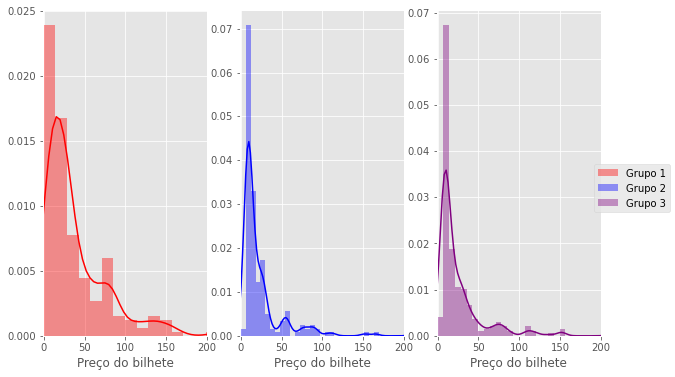

In [1728]:
fig, ax = plt.subplots(1,3, figsize=(10,6))

# Grupos
group1 = df_train[df_train["Age"]>=35]
group2 = df_train[(df_train["Age"]>=25)&(df_train["Age"]< 35)]
group3 = df_train[df_train["Age"]<25]

group_modes = np.array([
    group1["Fare"].mode().to_numpy(),
    group2["Fare"].mode().to_numpy(),
    group3["Fare"].mode().to_numpy()
])

group_means = np.array([
    group1["Fare"].mean(),
    group2["Fare"].mean(),
    group3["Fare"].mean()
])


print("Modas Grupo 1: ", *group_modes[0])
print("Modas Grupo 2: ", *group_modes[1])
print("Modas Grupo 3: ", *group_modes[2])

print("\nMédias Grupo 1: %.3f" % group_means[0])
print("Médias Grupo 2: %.3f" % group_means[1])
print("Médias Grupo 3: %.3f" % group_means[2])


sns.distplot(group1["Fare"], ax=ax[0], color="red", label="Grupo 1")
sns.distplot(group2["Fare"], ax=ax[1], color="blue", label="Grupo 2")
sns.distplot(group3["Fare"], ax=ax[2], color="purple", label="Grupo 3")

fig.legend(loc="center right")

# Mudar os labels do eixo x
for i in range(len(ax)):
    ax[i].xaxis.label.set_text("Preço do bilhete")
    ax[i].set_xlim(-1, 200)

    
# Criar médias e modas de cada grupo, mas agora da coluna Age
group_modes = np.array([
    group1["Age"].mode().to_numpy(),
    group2["Age"].mode().to_numpy(),
    group3["Age"].mode().to_numpy()
])

group_means = np.array([
    np.array([group1["Age"].mean()]),
    np.array([group2["Age"].mean()]),
    np.array([group3["Age"].mean()])
])

Bem temos que as modas do grupo 1 são 13 e 26, grupo 2 é 13 e grupo 3 é 8.<br>
Em relações a médias temos 47 por bilhete para o grupo 1, grupo 2 temos 25 por bilhete e grupo 3 com 31 por bilhete.<br><br>
As médias dizem que o grupo 1 como tem muitas amostras da 1ª classe e vão todas sozinhas ou apenas com 1 irmão/cônjugue, pagam mais devido à classe.<br>
Já o grupo 2 paga menos porque são de 2ª classe e ou vão sozinhos ou vão com 1 irmão/cônjugue, ou seja, classe mediana e poucas pessoas, o bilhete fica mais barato.<br>
O grupo 3 é a classe mais económica contudo é aquela onde vão mais irmãos/cônjugues, por isso que a média é maior em relação à d do grupo 2.<br><br>

**Na realidade não vou usar o preço do bilhete para separar ainda mais os grupos, acho que a classe e o número de irmãos/cônjugues já permite separar as amostras**

In [1729]:
for df in [df_train, df_test]:
    df["imput_ages_mode"] = df["Age"]
    df["imput_ages_mean"] = df["Age"]

def imput_ages(pclass, sibsp, age, group):
    """
        pclass: É a classe da amostra
        sibsp: É o número de irmãos/cônjugues da amostra
        age: É a idade da amostra
        group: lista com modas ou médias
    """
    if not np.isnan(age):
        return age
    
    if pclass == 1 or pclass == 2:
        if sibsp == 0 or sibsp == 1:
            return np.random.choice(group[pclass-1], 1).item()
    
    elif pclass == 3 and sibsp > 1:
        return np.random.choice(group[pclass-1], 1).item()
    
    return np.random.choice( df_train[df_train["Pclass"]==pclass]["Age"].mode(), 1).item()


# imputar idades com base nas modas
for df in [df_train, df_test]:
    df["imput_ages_mode"] = df_train.apply(
       lambda x: imput_ages(x["Pclass"], x["SibSp"], x["Age"], group_modes), axis=1
    )

# imputar com base nas médias
for df in [df_train, df_test]:
    df["imput_ages_mean"] = df.apply(
       lambda x: imput_ages(x["Pclass"], x["SibSp"], x["Age"], group_means), axis=1
    )

# Converter todas as idades para inteiro
for df in [df_train, df_test]:
    df["imput_ages_mode"] = df["imput_ages_mode"].astype(int)
    df["imput_ages_mean"] = df["imput_ages_mean"].astype(int)

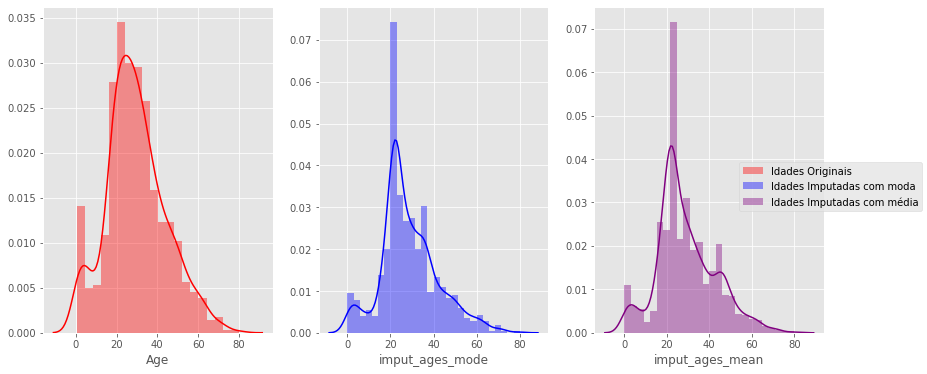

In [1730]:
fig, ax = plt.subplots(1,3, figsize=(14,6))

sns.distplot(df_train["Age"].dropna(axis=0), ax=ax[0], color="red", label="Idades Originais")
sns.distplot(df_train["imput_ages_mode"], ax=ax[1], color="blue", label="Idades Imputadas com moda")
sns.distplot(df_train["imput_ages_mean"], ax=ax[2], color="purple", label="Idades Imputadas com média")

fig.legend(loc="center right")

**O que se fez aqui?**<br><br>

O que eu fiz aqui foi criar os 3 grupos:
* group1 = Idades > 35
* group2 = Idades >= 25 e Idades < 35
* group3 = Idades < 25

Após ter as amostras separadas no seu respetivo grupo, fui à procura das condições que permitiram criar estes grupos:
* Tem classe 1 e tem apenas 0 ou 1 irmãos/cônjugues abordo ---> group1
* Tem classe 2 e tem apenas 0 ou 1 irmãos/cônjugues abordo ---> group2
* Tem classe 3 e tem mais que 1 irmão/cônjugue abordo ---> group3

Assim localizei todas as amostras que batiam com essas 3 condições, e a idade introduzida foi com base na moda das amostras que cumpriam a mesma condição.
Fiz exatamente o mesmo, só que em vez da moda usei a média. No fim fiquei com estas 2 colunas:

Contudo ainda tenho mais 2 formas para imputar as idades em falta:
* Fazer o mesmo, mas usar o número de pais/filhos para supor que aqueles que têm 1 pai/filho a acompanhar e têm a idade em falta, podem ter 0 anos (serem bebés).
* Outra forma é usar uma floresta aleatória(algoritmo baseado em Árvores de Decisões) para prever qual a melhor idade para cada amostra. 

In [1731]:
print("IDADES ORIGINAIS")
print("Média = %.3f" % df_train["Age"].mean())
print("Mediana = %.3f" % df_train["Age"].median())
print("Moda = %.3f" % df_train["Age"].mode())
print("Variância = %.3f" % df_train["Age"].var())
print("Desvio Padrão = %.3f" % df_train["Age"].std())

IDADES ORIGINAIS
Média = 29.699
Mediana = 28.000
Moda = 24.000
Variância = 211.019
Desvio Padrão = 14.526


In [1732]:
print("IDADES IMPUTADAS COM MODA")
print("Média = %.3f" % df_train["imput_ages_mode"].mean())
print("Mediana = %.3f" % df_train["imput_ages_mode"].median())
print("Moda = %.3f" % df_train["imput_ages_mode"].mode())
print("Variância = %.3f" % df_train["imput_ages_mode"].var())
print("Desvio Padrão = %.3f" % df_train["imput_ages_mode"].std())

IDADES IMPUTADAS COM MODA
Média = 28.744
Mediana = 26.000
Moda = 22.000
Variância = 178.364
Desvio Padrão = 13.355


In [1733]:
print("IDADES IMPUTADAS COM MÉDIA")
print("Média = %.3f" % df_train["imput_ages_mean"].mean())
print("Mediana = %.3f" % df_train["imput_ages_mean"].median())
print("Moda = %.3f" % df_train["imput_ages_mean"].mode())
print("Variância = %.3f" % df_train["imput_ages_mean"].var())
print("Desvio Padrão = %.3f" % df_train["imput_ages_mean"].std())

IDADES IMPUTADAS COM MÉDIA
Média = 28.954
Mediana = 26.000
Moda = 22.000
Variância = 188.770
Desvio Padrão = 13.739


Os valores mantiveram-se melhores do que estava à espera e ainda conseguimos reduzir um pouco a variância e desvio padrão.

In [1734]:
# Vou usar a coluna das modas apenas porque é que tem menos variância e desvio padrão
for df in [df_train, df_test]:
    df["imput_ages_babies"] = df["imput_ages_mode"]

def imput_ages_babies(parch, age, default):
    """
        parch: Número de filhos/pais da amostra
        age: Idade da amostra
        default: Valor atual da coluna imput_ages_babies
    """

    if parch > 1.0 and np.isnan(age):
        return 0
    
    return default

for df in [df_train, df_test]:
    df["imput_ages_babies"] = df.apply(
        lambda x: imput_ages_babies(x["Parch"], x["Age"], x["imput_ages_babies"]),
        axis=1

    )

In [1735]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        891 non-null    int64  
 1   Survived           891 non-null    int64  
 2   Pclass             891 non-null    int64  
 3   Name               891 non-null    object 
 4   Sex                891 non-null    int64  
 5   Age                714 non-null    float64
 6   SibSp              891 non-null    int64  
 7   Parch              891 non-null    int64  
 8   Ticket             891 non-null    object 
 9   Fare               891 non-null    float64
 10  Cabin              204 non-null    object 
 11  Embarked           889 non-null    object 
 12  imput_ages_mode    891 non-null    int32  
 13  imput_ages_mean    891 non-null    int32  
 14  imput_ages_babies  891 non-null    int64  
dtypes: float64(2), int32(2), int64(7), object(4)
memory usage: 97.6+ KB


In [1736]:
print("IDADES IMPUTADAS ONDE BEBÉS TÊM IDADE 0")
print("Média = %.3f" % df_train["imput_ages_babies"].mean())
print("Mediana = %.3f" % df_train["imput_ages_babies"].median())
print("Moda = %.3f" % df_train["imput_ages_babies"].mode())
print("Variância = %.3f" % df_train["imput_ages_babies"].var())
print("Desvio Padrão = %.3f" % df_train["imput_ages_babies"].std())

IDADES IMPUTADAS ONDE BEBÉS TÊM IDADE 0
Média = 28.432
Mediana = 26.000
Moda = 22.000
Variância = 188.974
Desvio Padrão = 13.747


Ficou extremamente idêntico ao da média!! A única coisa que feita: Foi pegar na coluna das idades imputadas com modas e substituir as idades de todas as amostras cujo número de pais/filhos superior a 1 E não tivessem idade, por 0.<br><br>
Por enquanto a melhor coluna é a das modas já que as médias e esta nova terem desvio padrão mais elevado.

In [1737]:
# Usar a Regressão Random Forest para prever as idades em falta
# Vamos usar apenas as variáveis completas e numéricas

# Guardar as samples que têm idades
df_rfr = df_train[df_train["Age"].notnull()][["Survived", "Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]]

# Guardar as samples que estão com idade em falta, removendo a coluna Age
df_missing = df_train[df_train["Age"].isnull()][["Survived", "Pclass", "Sex", "SibSp", "Parch", "Fare"]]

In [1738]:
df_rfr

,Survived,Pclass,Sex,SibSp,Parch,Fare,Age
0,0,3,0,1,0,7.2500,22.0
1,1,1,1,1,0,71.2833,38.0
2,1,3,1,0,0,7.9250,26.0
3,1,1,1,1,0,53.1000,35.0
4,0,3,0,0,0,8.0500,35.0
...,...,...,...,...,...,...,...
885,0,3,1,0,5,29.1250,39.0
886,0,2,0,0,0,13.0000,27.0
887,1,1,1,0,0,30.0000,19.0
889,1,1,0,0,0,30.0000,26.0


In [1739]:
df_missing

,Survived,Pclass,Sex,SibSp,Parch,Fare
5,0,3,0,0,0,8.4583
17,1,2,0,0,0,13.0000
19,1,3,1,0,0,7.2250
26,0,3,0,0,0,7.2250
28,1,3,1,0,0,7.8792
...,...,...,...,...,...,...
859,0,3,0,0,0,7.2292
863,0,3,1,8,2,69.5500
868,0,3,0,0,0,9.5000
878,0,3,0,0,0,7.8958


Criei 2 novos DataFrames:
* 1º são todas as amostras (714 amostras) que têm a idade definida, contudo só vou utilizar as variáveis explicativas numéricas e/ou que foram já tratadas
* 2º são todas as amostras (177 amostras) que têm as idades em falta, utilizo as mesmas variáveis, mas retirei a Age porque iria estar vazia, já que estamos a tratar de preenchê-la

In [1740]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

X = df_rfr.drop(["Age"], axis=1).values
y = df_rfr["Age"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

pipe_svr = Pipeline([
    ("scaler", StandardScaler()),
    #("dim_reduction", PCA()),
    ("svr", SVR(C=10.0, epsilon=0.3, tol=0.1))
    #("rf", RandomForestRegressor())
])

In [1741]:
pipe_svr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svr', SVR(C=10.0, epsilon=0.3, tol=0.1))])

In [1742]:
# Vamos prever as idades
pred_ages = pipe_svr.predict(df_missing.to_numpy()).astype(int)

In [1743]:
print("Score em prever dados de treino: %.3f" % pipe_svr.score(X_train, y_train))
print("Score em prever dados de teste: %.3f" % pipe_svr.score(X_test, y_test))

Score em prever dados de treino: 0.406
Score em prever dados de teste: 0.252


In [1744]:
pipe_rfr = Pipeline([
    ("scaler", StandardScaler()),
    #("dim_reduction", PCA()),
    ("rfr", RandomForestRegressor(n_estimators=100))
    #("rf", RandomForestRegressor())
])

pipe_rfr.fit(X_train, y_train)

# Vamos prever as idades
pred_ages = pipe_rfr.predict(df_missing.to_numpy()).astype(int)

print("Score em prever dados de treino: %.3f" % pipe_rfr.score(X_train, y_train))
print("Score em prever dados de teste: %.3f" % pipe_rfr.score(X_test, y_test))

Score em prever dados de treino: 0.754
Score em prever dados de teste: 0.134


In [1745]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor([
    ("pipe_svr", pipe_svr),
    ("pipe_rfr", pipe_rfr)
])

In [1746]:
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('pipe_svr',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svr',
                                              SVR(C=10.0, epsilon=0.3,
                                                  tol=0.1))])),
                            ('pipe_rfr',
                             Pipeline(steps=[('scaler', StandardScaler()),
                                             ('rfr',
                                              RandomForestRegressor())]))])

In [1747]:
print("Score em prever dados de treino: %.3f" % voting.score(X_train, y_train))
print("Score em prever dados de teste: %.3f" % voting.score(X_test, y_test))

Score em prever dados de treino: 0.640
Score em prever dados de teste: 0.231


Os scores estão horríveis, muito variância (modelo a overfitar muito!) e mesmo já tento tentado um GridSearch não melhorou. Decidi então usar um algoritmo de votos e mesmo assim os scores estão péssimos como se pode ver acima.<br><br>
De qualquer forma vamos aplicar as previsões no nosso dataset e comparar com as colunas de idades imputadas.

In [1748]:
pred_ages = voting.predict(df_missing.to_numpy()).astype(int)

In [1749]:
df_train["imput_ages_predicted"] = df_train["Age"]

df_train.loc[df_train["Age"].isnull(), "imput_ages_predicted"] = pred_ages
df_train["imput_ages_predicted"] = df_train["imput_ages_predicted"].astype(int)


##### Fazer o mesmo para o df_test ######



## Corrigir o único faltante em Fare
# Apesar de não estar aqui eu filtrei as amostras por 3ª classe e com idades entre 50 a 70
# só encontrei uma amostra que pagou 14.5 de bilhete, decidi então deixar este com 15
df_test["Fare"].fillna(15.0, inplace=True)

# Guardar as samples que têm idades
df_rfr = df_test[df_test["Age"].notnull()][["Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]]

# Guardar as samples que estão com idade em falta, removendo a coluna Age
df_missing = df_test[df_test["Age"].isnull()][["Pclass", "Sex", "SibSp", "Parch", "Fare"]]

X = df_rfr.drop(["Age"], axis=1).values
y = df_rfr["Age"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

pipe_svr = Pipeline([
    ("scaler", StandardScaler()),
    #("dim_reduction", PCA()),
    ("svr", SVR(C=10.0, epsilon=0.3, tol=0.1))
    #("rf", RandomForestRegressor())
])

pipe_svr.fit(X_train, y_train)

# Vamos prever as idades
pred_ages = pipe_svr.predict(df_missing.to_numpy()).astype(int)

voting = VotingRegressor([
    ("pipe_svr", pipe_svr),
    ("pipe_rfr", pipe_rfr)
])

voting.fit(X_train, y_train)

pred_ages = voting.predict(df_missing.to_numpy()).astype(int)

df_test["imput_ages_predicted"] = df_test["Age"]

df_test.loc[df_test["Age"].isnull(), "imput_ages_predicted"] = pred_ages
df_test["imput_ages_predicted"] = df_test["imput_ages_predicted"].astype(int)

In [1750]:
print("IDADES IMPUTADAS PREVISTAS")
print("Média = %.3f" % df_train["imput_ages_predicted"].mean())
print("Mediana = %.3f" % df_train["imput_ages_predicted"].median())
print("Moda = %.3f" % df_train["imput_ages_predicted"].mode())
print("Variância = %.3f" % df_train["imput_ages_predicted"].var())
print("Desvio Padrão = %.3f" % df_train["imput_ages_predicted"].std())

IDADES IMPUTADAS PREVISTAS
Média = 29.148
Mediana = 27.000
Moda = 26.000
Variância = 184.241
Desvio Padrão = 13.574


Continua a ter valores superiores às nossas idades substituídas pela moda. O que mudou mais foi a moda onde na nossa coluna de dados imputados por modas temos: moda 22<br>
Aqui temos moda de 30, por isso que os restantes cálculos deram ligeiramente superiores.<br><br>
**Lembro que os algoritmos utilizados para prever, aplicaram os cálculos no dataset original (sem as variáveis incompletas e/ou categóricas)! E apesar de ter tido uma performance muito baixa, retornou valores bem próximos aos que previ utilizando as medidas demoda/média.**<br><br>
Será algo bom ou mau?<br><br><br>

In [1751]:
# Coeficiente de variância da variável "imput_ages_mode" para cada classe
print("Variável 'imput_ages_mode'")
for i in range(1,4):
    std = df_train[ df_train["Pclass"] == i]["imput_ages_mode"].std()
    mean = df_train[ df_train["Pclass"] == i]["imput_ages_mode"].mean()
    
    print("Coeficiente variação para %dª classe = %.3f" % (i, (std/mean) * 100))

print("Mediana = ", np.median( df_train["imput_ages_mode"].sort_values().values ) )
print("Média = ", df_train["imput_ages_mode"].mean() )

print("\nVariável 'imput_ages_predicted'")
# Coeficiente de variância da variável "imput_ages_predicted" para cada classe
for i in range(1,4):
    std = df_train[ df_train["Pclass"] == i]["imput_ages_predicted"].std()
    mean = df_train[ df_train["Pclass"] == i]["imput_ages_predicted"].mean()
    
    print("Coeficiente variação para %dª classe = %.3f" % (i, (std/mean) * 100))


print("Mediana = ", np.median( df_train["imput_ages_predicted"].sort_values().values ) )
print("Média = ", df_train["imput_ages_predicted"].mean() )

Variável 'imput_ages_mode'
Coeficiente variação para 1ª classe = 36.299
Coeficiente variação para 2ª classe = 45.631
Coeficiente variação para 3ª classe = 44.022
Mediana =  26.0
Média =  28.744107744107744

Variável 'imput_ages_predicted'
Coeficiente variação para 1ª classe = 36.675
Coeficiente variação para 2ª classe = 45.656
Coeficiente variação para 3ª classe = 44.740
Mediana =  27.0
Média =  29.14814814814815


Estava virado para aceitar que a medida da moda para imputar tinha sido a melhor, mas podemos ver que a mediana e a média estão mais próximas com os dados previstos o que pode querer dizer que temos menos outliers (eles influenciam a média, afastando-a da mediana).<br>
O coeficiente de variação parece ligeiramente inferior em todas as classes exceto na 1ª.<br><br>
Conclusão vou arriscar usar os valores previstos como as idades oficiais e todas as outras serão eliminadas.

Bem e com isto termino a análise da variável explicativa *Pclass*, ou seja, classe do bilhete comprado.<br>
E sim a variável explicativa *Cabin* deve ter uma relação interessante com a Pclass, já que muito provavelmente as cabines mais próximas do topo (A,B,C etc) deveriam ser para a 1ª classe. Quanto mais para baixo as cabines, menor será a classe.<br>
No entanto é preciso transformar essa variável categórica numa variável numérica e isso poderá trazer algumas dores de cabeça. Então para já ficamos assim e logo que estude a variável *Cabin* mostrarei a relação que tem com *Pclass*

In [1752]:
## Vou colocar os valores da "imput_ages_mode" no "Age" e dropar todas as outras criadas

for df in [df_train, df_test]:
    df["Age"] = df["imput_ages_predicted"]
    df.drop(["imput_ages_mode", "imput_ages_mean", "imput_ages_babies", "imput_ages_predicted"], axis=1, inplace=True)

## Sexo e Survived

Próxima variável que vou estudar é a "Sex", ela era inicialmente categórica nominal ("M" - masculino, "F" - Feminino)<br>
Eu converti-os para números( 1 = feminino, 0 = masculino)

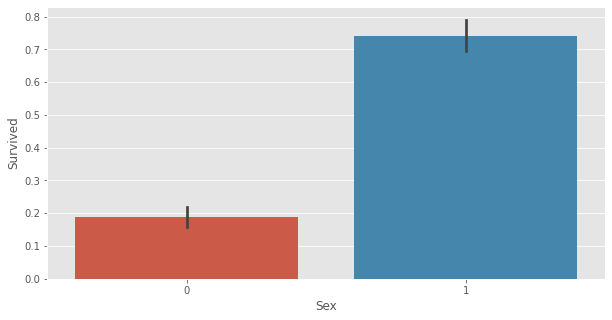

In [1753]:
plt.figure(figsize=(10,5))
sns.barplot(df_train["Sex"], df_train["Survived"])

In [1754]:
# Número de pessoas de sexo feminino e masculino
f_num = df_train[df_train["Sex"]==1]["Sex"].count()
m_num = df_train[df_train["Sex"]==0]["Sex"].count()

# Todas as pessoas de sexo feminino e masculino que sobreviveram
f_survived = df_train[(df_train["Sex"]==1)&(df_train["Survived"]==1)]["Sex"].count()
m_survived = df_train[(df_train["Sex"]==0)&(df_train["Survived"]==1)]["Sex"].count()

# Percentagem de pessoas do sexo feminino e masculino que sobreviveram
f_percent_survived = f_survived / f_num *100
m_percent_survived = f_survived / m_num *100

print("Número total de pessoas do sexo feminino: ", f_num)
print("Número total de pessoas do sexo masculino: ", m_num)

print("\nNúmero de pessoas do sexo feminino que sobreviveram: ", f_survived)
print("Número de pessoas do sexo masculino que sobreviveram: ", m_survived)

print("\n%% de pessoas do sexo feminino que sobreviveram: %.3f%%" % f_percent_survived)
print("%% de pessoas do sexo masculino que sobreviveram: %.3f%%" % m_percent_survived)

Número total de pessoas do sexo feminino:  314
Número total de pessoas do sexo masculino:  577

Número de pessoas do sexo feminino que sobreviveram:  233
Número de pessoas do sexo masculino que sobreviveram:  109

% de pessoas do sexo feminino que sobreviveram: 74.204%
% de pessoas do sexo masculino que sobreviveram: 40.381%


Mesmo havendo mais pessoas de sexo masculino do que de sexo feminino, o sexo feminino foi quem sobreviveu mais.<br>
Uma suposição que podemos retirar daqui é que quando há alguma emergência as prioridades, normalmente. são: crianças, mulheres, homens e idosos (posso estar errado)<br><br>
Sendo assim faz sentido mais pessoas do sexo feminino terem sobrevivido já que deveriam ter tido prioridade de evacuação.

Vou calcular a percentagem de sobrevivente menores de 18 anos, para ver se esta suposição torn-se mais forte

In [1755]:
c_num = df_train[df_train["Age"]<18]["Age"].count()

c_survived = df_train[(df_train["Age"]<18)&(df_train["Survived"]==1)]["Age"].count()

c_percent_survived = c_survived / c_num *100

print("Número total de pessoas menores de 18 anos: ", c_num)
print("Número de pessoas menores de 18 anos que sobreviveram: ", c_survived)
print("%% de pessoas menores de 18 anos que sobreviveram: %.3f%%" % c_percent_survived)

Número total de pessoas menores de 18 anos:  124
Número de pessoas menores de 18 anos que sobreviveram:  67
% de pessoas menores de 18 anos que sobreviveram: 54.032%


Menores de 18 anos, um pouco mais de metade sobreviveu. Vamos ver de 15 anos para baixo.

In [1756]:
c_num = df_train[df_train["Age"]<15]["Age"].count()

c_survived = df_train[(df_train["Age"]<15)&(df_train["Survived"]==1)]["Age"].count()

c_percent_survived = c_survived / c_num *100

print("Número total de pessoas menores de 15 anos: ", c_num)
print("Número de pessoas menores de 15 anos que sobreviveram: ", c_survived)
print("%% de pessoas menores de 15 anos que sobreviveram: %.3f%%" % c_percent_survived)

Número total de pessoas menores de 15 anos:  86
Número de pessoas menores de 15 anos que sobreviveram:  49
% de pessoas menores de 15 anos que sobreviveram: 56.977%


Aumentou ligeiramente, mas nada demais. Podemos levar em consideração a suposição, mas não podemos apoiar-nos a 100% nela!<br><br>
Podemos fazer um teste de hipótese:
* Se há diferença entre a taxa de mortalidade entre sexo feminino e masculino

In [1757]:
from scipy.stats import ttest_1samp

# média de sobrevivencia do sexo feminino
f_mean = np.mean( df_train[ df_train["Sex"]==1 ]["Survived"] )

# Verificar se a média do sexo feminino está longe dos valores
# de sobrevivencia do sexo masculino
t_stats, p_val = ttest_1samp(m_survived, f_mean)
print("Valor P = %E" % p_val)

Valor P = NAN


c:\users\tigax\appdata\local\programs\python\python37\lib\site-packages\numpy\core\fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
c:\users\tigax\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Parece que os valores de sobrebvivência do teste masculino estão bem longe da média dos valores femininos.<br><br>
Agora vamos testar se há diferença entre a sobrevivência do sexo masculino e feminino:<br>
$H0:$ Não há diferença na sobreviência entre sexo feminino e masculino, $x = 0$ <br>
$H1:$ Há sim diferença na sobreviência entre sexo feminino e masculino, $x \neq 0$

In [1758]:
t_stats, p_val, deg_freedom = ttest_ind(df_train[df_train["Sex"]==1]["Survived"], df_train[df_train["Sex"]==0]["Survived"])

print("Valor P = %e" %  p_val)

Valor P = 1.406066e-69


Bem eu diria que o valor p rejeita a hipótese nula. Logo há sim diferença entre a sobrevivencia do sexo masculino e feminino<br><br>
Lembrando que `ttest_1samp` compara se a média da nossa matriz *m_survived* é igual à média da matriz *f_survived*<br>
Já o `ttest_ind` calcula o quão significante é essa diferença entre os sexos e a sobrevivência.

# Voltámos para a análise exploratória

## Sexo e SibSp

Verificar relações entre Sexo e número de irmãos/cônjugues

c:\users\tigax\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


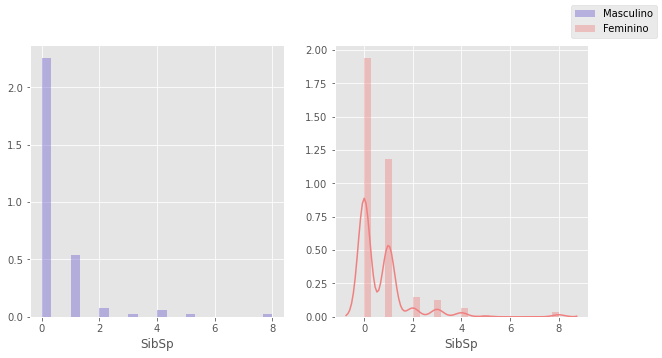

In [1759]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

gender = {"0": "Masculino", "1": "Feminino"}
colors = ["slateblue", "lightcoral"]

for i in range(0,2):
    sns.distplot(df_train[df_train["Sex"]==i]["SibSp"], ax=ax[i], label=gender[str(i)], color=colors[i])

fig.legend()

In [1760]:
for i in range(0,2):
    # variável com o número total de amostras de um sexo
    total = m_num if i == 0 else f_num
    
    for j in range(0,9):
        count_sibs = df_train[(df_train["Sex"]==i)&(df_train["SibSp"]==j)]["Sex"].count()
        
        print("Sexo %s tem %d-%d%% amostras com %d como número de irmãos/cônjugues" % (gender[str(i)], 
                                                                                     count_sibs, 
                                                                                     (count_sibs/total)*100,
                                                                                     j))
        
    print()

Sexo Masculino tem 434-75% amostras com 0 como número de irmãos/cônjugues
Sexo Masculino tem 103-17% amostras com 1 como número de irmãos/cônjugues
Sexo Masculino tem 15-2% amostras com 2 como número de irmãos/cônjugues
Sexo Masculino tem 5-0% amostras com 3 como número de irmãos/cônjugues
Sexo Masculino tem 12-2% amostras com 4 como número de irmãos/cônjugues
Sexo Masculino tem 4-0% amostras com 5 como número de irmãos/cônjugues
Sexo Masculino tem 0-0% amostras com 6 como número de irmãos/cônjugues
Sexo Masculino tem 0-0% amostras com 7 como número de irmãos/cônjugues
Sexo Masculino tem 4-0% amostras com 8 como número de irmãos/cônjugues

Sexo Feminino tem 174-55% amostras com 0 como número de irmãos/cônjugues
Sexo Feminino tem 106-33% amostras com 1 como número de irmãos/cônjugues
Sexo Feminino tem 13-4% amostras com 2 como número de irmãos/cônjugues
Sexo Feminino tem 11-3% amostras com 3 como número de irmãos/cônjugues
Sexo Feminino tem 6-1% amostras com 4 como número de irmãos/cônj

A maioria dos sexos tem foco em 0 irmãos/cônjugues e logo de seguida em apenas 1.<br>
A única diferença é que o sexo masculino tem um diferença maior entre 0 e 1 irmãos/cônjuges($\approx 58\%$), já o sexo feminino tem apenas, $\approx 22\%$.

## Sexo e Parch

Relação entre sexo e número de pais/filhos

c:\users\tigax\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


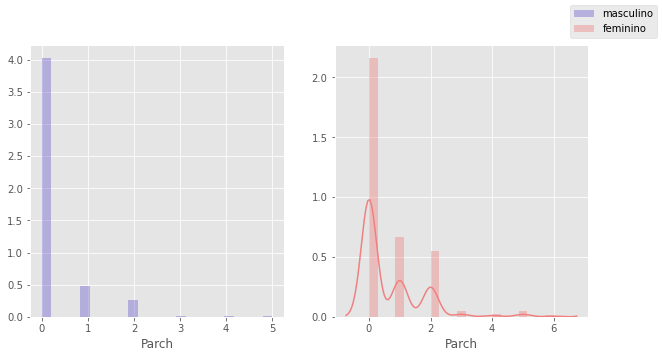

In [1761]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

gender = {"0": "masculino", "1": "feminino"}
colors = ["slateblue", "lightcoral"]

for i in range(0,2):
    sns.distplot(df_train[df_train["Sex"]==i]["Parch"], ax=ax[i], label=gender[str(i)], color=colors[i])

fig.legend()

In [1762]:
for i in range(0,2):
    # variável com o número total de amostras de um sexo
    total = m_num if i == 0 else f_num
    
    for j in range(0,6):
        count_sibs = df_train[(df_train["Sex"]==i)&(df_train["Parch"]==j)]["Sex"].count()
        
        print("Sexo %s tem %d-%d%% amostras com %d como número de irmãos/cônjugues" % (gender[str(i)], 
                                                                                     count_sibs, 
                                                                                     (count_sibs/total)*100,
                                                                                     j))
        
    print()

Sexo masculino tem 484-83% amostras com 0 como número de irmãos/cônjugues
Sexo masculino tem 58-10% amostras com 1 como número de irmãos/cônjugues
Sexo masculino tem 31-5% amostras com 2 como número de irmãos/cônjugues
Sexo masculino tem 1-0% amostras com 3 como número de irmãos/cônjugues
Sexo masculino tem 2-0% amostras com 4 como número de irmãos/cônjugues
Sexo masculino tem 1-0% amostras com 5 como número de irmãos/cônjugues

Sexo feminino tem 194-61% amostras com 0 como número de irmãos/cônjugues
Sexo feminino tem 60-19% amostras com 1 como número de irmãos/cônjugues
Sexo feminino tem 49-15% amostras com 2 como número de irmãos/cônjugues
Sexo feminino tem 4-1% amostras com 3 como número de irmãos/cônjugues
Sexo feminino tem 2-0% amostras com 4 como número de irmãos/cônjugues
Sexo feminino tem 4-1% amostras com 5 como número de irmãos/cônjugues



Tivemos um comportamento idêntico ao *SibSp*, foco sempre em 0 e 1, mas o sexo feminino não tem tanta diferença como o sexo masculino tem.

## Sexo e Idades

Relação entre o sexo e a idade

In [1763]:
print("Correlação %.3f" % df_train["Sex"].corr(df_train["Age"]))

Correlação -0.117


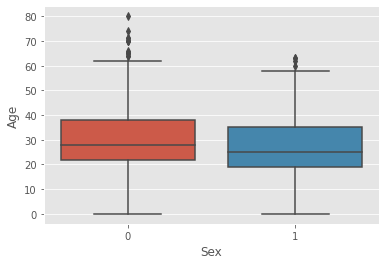

In [1764]:
sns.boxplot(data=df_train, x="Sex", y="Age")

In [1765]:
for i in range(0,2):
    first_q = np.quantile( df_train[(df_train["Sex"]==i)]["Age"].to_numpy(), 0.25)
    median = np.quantile( df_train[(df_train["Sex"]==i)]["Age"].to_numpy(), 0.5)
    third_q = np.quantile( df_train[(df_train["Sex"]==i)]["Age"].to_numpy(), 0.75)
    print("Interquartis sexo %s\n" % gender[str(i)])
    print("1º Quartil = %.3f" % first_q)
    print("2º Quartil = %.3f" % median)
    print("3º Quartil = %.3f" % third_q)
    print()

Interquartis sexo masculino

1º Quartil = 22.000
2º Quartil = 28.000
3º Quartil = 38.000

Interquartis sexo feminino

1º Quartil = 19.000
2º Quartil = 25.000
3º Quartil = 35.000



Observando os boxplots podemos verificar que a maior concentração de amostras está nos interquartis, mais especificamente entre o 1º e o 2º(mediana)<br>
Podemos confirmar que as idades, com maior concentração, do sexo feminino são ligeiramente inferiores às do sexo masculino.<br><br>
A correlação mostrou que estas não têm grande dependência.

In [1766]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 80.2+ KB


## Sexo e Preço do bilhete

O quanto o sexo da amostra influência no preço do bilhete. 

In [1767]:
# Calcular média, moda e mediana para cada sexo
for i in range(2):
    print("Média do bilhete para o sexo %s = %.3f" %(gender[str(i)], df_train[df_train["Sex"]==i]["Fare"].mean()))
    print("Mediana do bilhete para o sexo %s = %.3f" %(gender[str(i)], df_train[df_train["Sex"]==i]["Fare"].median()))
    print("Moda do bilhete para o sexo %s = %.3f" %(gender[str(i)], df_train[df_train["Sex"]==i]["Fare"].mode()))
    print("\n")

Média do bilhete para o sexo masculino = 25.524
Mediana do bilhete para o sexo masculino = 10.500
Moda do bilhete para o sexo masculino = 8.050


Média do bilhete para o sexo feminino = 44.480
Mediana do bilhete para o sexo feminino = 23.000
Moda do bilhete para o sexo feminino = 7.750




A moda de ambos é bem próxima, contudo as médias estão altas e fogem da mediana, principlamente a do sexo feminino. Podemos ter alguns outliers a influenciar

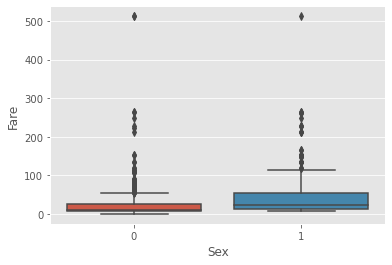

In [1768]:
sns.boxplot(df_train["Sex"], df_train["Fare"])

In [1769]:
# Verificar as amostras com preços superiores a 500$
df_train[df_train["Fare"] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",1,35,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",0,36,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",0,35,0,0,PC 17755,512.3292,B101,C


In [1770]:
df_train[(df_train["Pclass"]==1)&(df_train["Ticket"]=="PC 17755")]["PassengerId"].value_counts()

259    1
738    1
680    1
Name: PassengerId, dtype: int64

Que interessante ... As pessoas que pagam 500 de bilhete, vão sozinhas, têm o mesmo bilhete e pagam exatamente 512.3292. Parecem-me outliers

In [1771]:
# Índices das amostras a dropar
index_drop = df_train[(df_train["Pclass"]==1)&(df_train["Ticket"]=="PC 17755")]["PassengerId"].index.to_list()

df_train.drop(index=index_drop, axis=0, inplace=True)

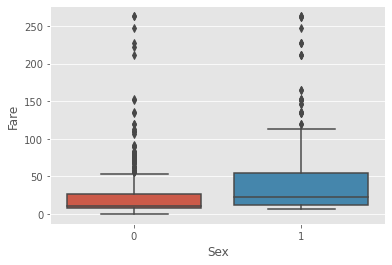

In [1772]:
sns.boxplot(df_train["Sex"], df_train["Fare"])

In [1773]:
df_train[df_train["Fare"]>=200]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",1,23,3,2,19950,263.0000,C23 C25 C27,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",0,24,0,1,PC 17558,247.5208,B58 B60,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",1,50,0,1,PC 17558,247.5208,B58 B60,C
311,312,1,1,"Ryerson, Miss. Emily Borie",1,18,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",1,24,3,2,19950,263.0000,C23 C25 C27,S
377,378,0,1,"Widener, Mr. Harry Elkins",0,27,0,2,113503,211.5000,C82,C
380,381,1,1,"Bidois, Miss. Rosalie",1,42,0,0,PC 17757,227.5250,NaN,C
438,439,0,1,"Fortune, Mr. Mark",0,64,1,4,19950,263.0000,C23 C25 C27,S
527,528,0,1,"Farthing, Mr. John",0,33,0,0,PC 17483,221.7792,C95,S


In [1774]:
tickets_list = df_train[df_train["Fare"]>=200]["Ticket"].to_list()

tickets = {}

for i in tickets_list:
    if i in tickets.keys():
        tickets[i] += 1
    else:
        tickets[i] = 1

tickets

{'19950': 4,
 'PC 17558': 2,
 'PC 17608': 2,
 '113503': 1,
 'PC 17757': 4,
 'PC 17483': 1,
 '24160': 3}

Os tickets que têm mais que 1 SibSp e/ou Parch, podem até fazer algum sentido já que cada acompanhante terá o mesmo bilhete.<br>
Aqueles que têm apenas 1 bilhete, não faz sentido pagar 200 por ele

In [1775]:
df_train[(df_train["Ticket"]=="113503")|(df_train["Ticket"]=="PC 17483")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
377,378,0,1,"Widener, Mr. Harry Elkins",0,27,0,2,113503,211.5000,C82,C
527,528,0,1,"Farthing, Mr. John",0,33,0,0,PC 17483,221.7792,C95,S


O Ticket *113503* diz que tem 1 Parch, contudo mais ninguém tem esse ticket!<br>
Ambos pagam acima de 210 de bilhete (o que me parece muito alto, mesmo para 1ª classe), portanto vamos observar a média, mediana e moda de preços da 1ª classe

Temos uma média de $\approx 78$, uma mediana $\approx 57$ e por fim uma moda de $\approx 27$.<br>

Isto para todos da 1ª classe, ambas as amostras vão praticamente sozinhas, vamos filtrar tbm os SibSp e Parch para valores <= 1

A moda mantém-se, já a média baixo para $\approx 67$ e a mediana para $\approx 55$<br><br>
Vou remover ambas as amostras por parecerem outliers

In [1776]:
# Dropar as 2 amostras
df_train.drop(index=[377, 527], axis=0, inplace=True)

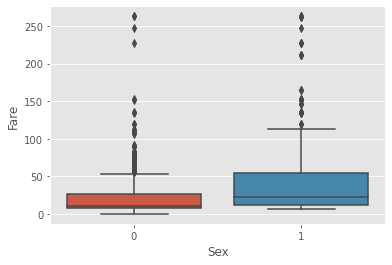

In [1777]:
sns.boxplot(df_train["Sex"], df_train["Fare"])

Vou deixar uma análise mais detalhada dos preços quando falar da coluna preços

In [1778]:
df_train["Sex"].corr(df_train["Fare"], method="spearman")

0.26536537527426507

Ou seja, sexo maior (no caso feminino porque é 1) maior o preço, o que bate certo com a estatística descritiva acima.

## Sexo e Preço do bilhete

In [1779]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  886 non-null    int64  
 1   Survived     886 non-null    int64  
 2   Pclass       886 non-null    int64  
 3   Name         886 non-null    object 
 4   Sex          886 non-null    int64  
 5   Age          886 non-null    int32  
 6   SibSp        886 non-null    int64  
 7   Parch        886 non-null    int64  
 8   Ticket       886 non-null    object 
 9   Fare         886 non-null    float64
 10  Cabin        200 non-null    object 
 11  Embarked     884 non-null    object 
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 126.5+ KB


## Pclass e Preço do Bilhete

Apesar de já ter estudado a variável *Pclass*, não cheguei a estudar a relação dela com o preço do bilhete

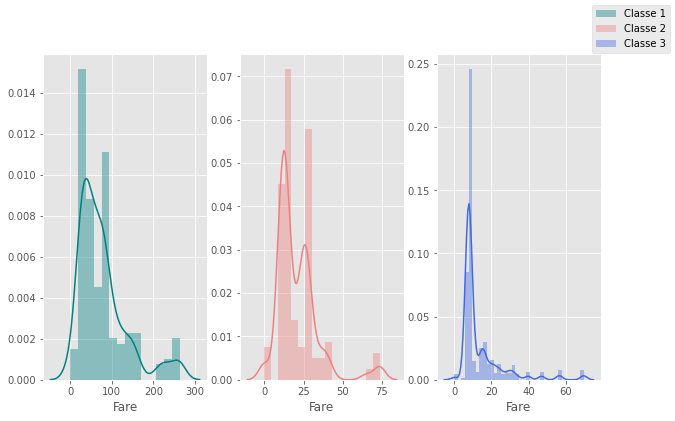

In [1780]:
fig, ax = plt.subplots(1, 3, figsize=(10,6))

colors = ["teal", "lightcoral", "royalblue"]

for i in range(3):
    sns.distplot(df_train[df_train["Pclass"]==i+1]["Fare"], 
                 ax=ax[i], 
                 label="Classe {}".format(i+1),
                color=colors[i])

fig.legend()

Pelo gráfico podemos ver algo que parecem outliers, no entanto pelas análises acima, são apenas bilhetes familiares que não parece ser outliers

In [1781]:
for i in range(3):
    print("Média de preços para a %dª classe = %.3f" % (i+1, df_train[df_train["Pclass"]==i+1]["Fare"].mean()))
    print("Mediana de preços para a %dª classe = %.3f" % (i+1, df_train[df_train["Pclass"]==i+1]["Fare"].median()))
    print("Moda de preços para a %dª classe = %.3f" % (i+1, df_train[df_train["Pclass"]==i+1]["Fare"].mode()))
    print()

Média de preços para a 1ª classe = 76.811
Mediana de preços para a 1ª classe = 57.979
Moda de preços para a 1ª classe = 26.550

Média de preços para a 2ª classe = 20.662
Mediana de preços para a 2ª classe = 14.250
Moda de preços para a 2ª classe = 13.000

Média de preços para a 3ª classe = 13.676
Mediana de preços para a 3ª classe = 8.050
Moda de preços para a 3ª classe = 8.050



As médias, medianas e modas de preços por classe aparentam ser bem distribuidas. Obviamente quanto maior a classe, mais elevado o preço do bilhete

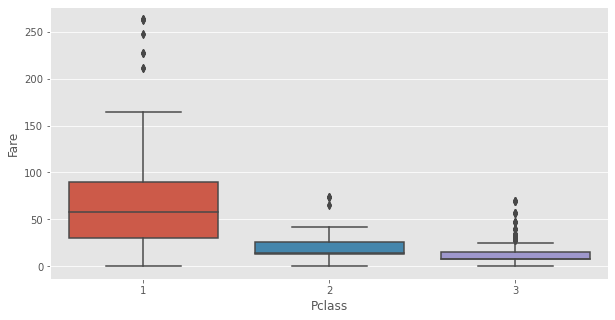

In [1782]:
plt.figure(figsize=(10,5))
sns.boxplot(df_train["Pclass"], df_train["Fare"])

Os preços fora da distribuição, como já tinha dito anteriormente, são de de bilhetes familiares. E podemos observar que há muito mais na 3ª classe.

## Conclusão

Talvez devesse estudar melhor as variáveis, mas para já, daquelas que estão prontas para serem estudadas, acho que consegui extrair e entender melhor as informações que elas passam!<br><br>

O próximo passo é tratar as variáveis:<br>
* Name
* Cabin
* Embarked
* Ticket

As 3 primeiras têm muitos dados faltantes e são categóricas, portanto teremos que preencher todas as amostras e arranjar forma de converter tudo para variáveis numéricas.<br><br>

O ticket eu acho interessante agrupamos amostras que tenham tickets iguais (não sei se será uma boa hipótese, mas irei testar), já que isso significa que as amostras eram uma família, e isso pode influenciar na taxa de mortalidade.<br><br>

As cabines (*Cabin*) podem influenciar também já que as primeira serão com certeza utilizadas pela 1ª classe, o que faz com que ficassem mais próximos da superfície (+ probabilidade de sobrevivência)<br><br>
Os nomes(*Name*) podem nos ajudar a descobrir famílias e fora o sexo da pessoa<br><br>
O porto onde embarcaram (*Embarked*) pode ser influenciado pela classe e também pode influenciar a sobrevivência, já que quem apanhou no primeiro porto talvez tenha tido uma maior chance de ficar numa cabine mais próxima da superfície, por exemplo.

# Tratamento de Dados

Bem aqui vamos tratar os dados que faltam, não implica que não faça alguma análise no meio, mas o foco é o tratamento dos mesmos. E quem sabe criação de novas features mais ricas em informações.

In [1783]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  886 non-null    int64  
 1   Survived     886 non-null    int64  
 2   Pclass       886 non-null    int64  
 3   Name         886 non-null    object 
 4   Sex          886 non-null    int64  
 5   Age          886 non-null    int32  
 6   SibSp        886 non-null    int64  
 7   Parch        886 non-null    int64  
 8   Ticket       886 non-null    object 
 9   Fare         886 non-null    float64
 10  Cabin        200 non-null    object 
 11  Embarked     884 non-null    object 
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 126.5+ KB


In [1784]:
df_train["Cabin"].isnull().mean()

0.7742663656884876

O feature *Cabin* tem 77% de dados em falta, talvez o melhor neste caso é remover esta coluna já que imputar valores pode causar imprecisão nos resultados.

### Embarked

Aqui vou apenas fazer um one hot encoding dropando a primeira coluna isso porque, dá para representar 3 valores possíveis com apenas 2 colunas, por exemplo:
* 0 | 1
* 1 | 0
* 0 | 0

Claro que antes disso vou imputar os 2 valores que faltam

In [1785]:
## Vamos ver quem é que são as 2 amostras que faltam
df_train[df_train["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62,0,0,113572,80.0,B28,NaN


In [1786]:
df_train[(df_train["Pclass"]==1)&
         (df_train["Age"]>=30)&
         (df_train["Age"]<=38)&
         (df_train["SibSp"]==0)&
         (df_train["Parch"]==0)&
         (df_train["Fare"]>=75)&
         (df_train["Fare"]<=85)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",1,38,0,0,113572,80.0000,B28,NaN
218,219,1,1,"Bazzani, Miss. Albina",1,32,0,0,11813,76.2917,D15,C
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",1,37,0,0,PC 17585,79.2000,NaN,C


Encontramos 2 amostras idênticas à nossa outra de 38 anos, 1ª classe, perto de 80 de bilhete e não tem SibSp nem Parch

In [1787]:
df_train[(df_train["Pclass"]==1)&
         (df_train["Age"]>=50)&
         (df_train["Age"]<=70)&
         (df_train["SibSp"]==0)&
         (df_train["Parch"]==0)&
         (df_train["Fare"]>=50)&
         (df_train["Fare"]<=70)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",0,54,0,0,17463,51.8625,E46,S
185,186,0,1,"Rood, Mr. Hugh Roscoe",0,52,0,0,113767,50.0000,A32,S


O preço não é idêntico ao pago pela nossa outra amostra mas são as amostras mais próximas.<br><br>
Portanto a amostra de índice 61 e 829 vão receber embarked *C* e *S*

In [1788]:
df_train.loc[61, "Embarked"] = "C"

In [1789]:
df_train.loc[829, "Embarked"] = "S"

In [1790]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  886 non-null    int64  
 1   Survived     886 non-null    int64  
 2   Pclass       886 non-null    int64  
 3   Name         886 non-null    object 
 4   Sex          886 non-null    int64  
 5   Age          886 non-null    int32  
 6   SibSp        886 non-null    int64  
 7   Parch        886 non-null    int64  
 8   Ticket       886 non-null    object 
 9   Fare         886 non-null    float64
 10  Cabin        200 non-null    object 
 11  Embarked     886 non-null    object 
dtypes: float64(1), int32(1), int64(6), object(4)
memory usage: 126.5+ KB


In [1791]:
# Aplicamos já em ambos os datasets
df_train = pd.get_dummies(df_train, columns=["Embarked"], drop_first=True)
df_test = pd.get_dummies(df_test, columns=["Embarked"], drop_first=True)

In [1792]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,0,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27,0,0,211536,13.0000,NaN,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19,0,0,112053,30.0000,B42,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,24,1,2,W./C. 6607,23.4500,NaN,0,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26,0,0,111369,30.0000,C148,0,0


### Tickets

A minha ideia seria colocar os bilhetes como família. Então contaria o número de bilhetes repetidos e guardaria, as amostras com o mesmo ticket seriam rotuladas como X família. Amostras com tickets únicos serião consideradas sozinhas. 

In [1793]:

for df in [df_train, df_test]:
    
    tickets = dict()
    
    for i in df["Ticket"].values:
        if i in tickets.keys():
            tickets[i] += 1
        else:
            tickets[i] = 1

    # Ordernar de forma descrecente pelo número de tickets iguais
    tickets = dict(sorted(tickets.items(), key=lambda x: x[1], reverse=True))
    
    # Substituir valores da contagem por rótulos
    for key, value in tickets.items():
        if value == 1:
            tickets[key] = "Sozinho"
        else:
            tickets[key] = "Acompanhado"

    print( len(tickets) )
    
    df["Acompanhado"] = df["Ticket"].map(tickets)

df_train = pd.get_dummies(df_train, columns=["Acompanhado"], drop_first=True)
df_test = pd.get_dummies(df_test, columns=["Acompanhado"], drop_first=True)

678
363


In [1794]:
df_train[df_train.columns[1:]].corr()["Survived"][:]

Survived               1.000000
Pclass                -0.338045
Sex                    0.545306
Age                   -0.087174
SibSp                 -0.034271
Parch                  0.083776
Fare                   0.276407
Embarked_Q             0.004438
Embarked_S            -0.148049
Acompanhado_Sozinho   -0.217287
Name: Survived, dtype: float64

A ideia era ter uma coluna que tivesse cada família ou no caso sozinho, mas isso faria que quando fizessemos one-hot-encoding, ficássemos com 140 features!! Estaria a complicar o modelo, desta forma temos uma variável que tem mais correlação que o SibSp e Parch, o que pode ser um bom sinal.

### Name

Acho que vai ser redundante a minha ideia, mas vamos ver se terá o correlação elevada com a variável Sexo.<br>
Isto porque vou tentar separar os nomes com base em Mr, Ms etc. Isso pode correlacionar fortemente com Sexo já que Ms é usado com uma pessoa do sexo feminino e Mr com sexo masculino.<br><br>
Não há nada como testar para ver

In [1795]:
# Já aplicamos esta tranformação em todos os datasets (treino e teste)

for index, df in enumerate([df_train, df_test]):
    names = dict()
    names_list = []
    for i, r in df.iterrows():

        # Primeiro splitamos por vírgula e pegamos a parte do nome: Mr./Ms. qualquer coisa
        # Depois splitamos pelo . e pegamos a primeira parte que é só o pronome
        name = r["Name"].split(",")[1].split(".")[0].strip()

        # Ms é uma pessoa do sexo feminina casada ou não
        # logo lady, mme (madamme), mlle (mademoiselle) ficam como Ms
        if name == "Lady" or name == "Mme" or name == "Mlle":
            name = "Ms"

        # Sir ou Mr dá o mesmo portanto vamos colocar
        # Sir como Mr
        # Don -> prof na unviersidade Oxford ou Cambridge
        if name == "Sir" or name == "Don":
            name = "Mr"

        names_list.append(name)

        if name in names.keys():
            names[name] += 1
        else:
            names[name] = 1
    
    print( sum(names.values()) )
    print( names )
    
    # Se eu fizesse df = a qualquer coisa, não ia fazer nada no df_train ou df_test, porque
    # para atribuir alguma coisa a eles tem que ser diretamente!
    # Então obti os índices da lista de dfs e com base nos índices consigo saber
    # qual deles usar para atribuir a lista de nomes
    if index == 0:
        df_train["Pron"] = names_list
    else:
        df_test["Pron"] = names_list

886
{'Mr': 515, 'Mrs': 125, 'Miss': 181, 'Master': 40, 'Rev': 6, 'Dr': 7, 'Ms': 5, 'Major': 2, 'Col': 2, 'Capt': 1, 'the Countess': 1, 'Jonkheer': 1}
418
{'Mr': 240, 'Mrs': 72, 'Miss': 78, 'Master': 21, 'Ms': 1, 'Col': 2, 'Rev': 2, 'Dr': 1, 'Dona': 1}


Precisamos remover mais alguns "títulos"/"pronomes" para depois podermos fazer o one-hot.<br>
Então agora eu vou analisar 1 a 1 sem ser Mr, Mrs, Miss, Ms e Master

In [1796]:
# Rev -> Reverendo 
print( df_train[df_train["Pron"]=="Rev"] )
print( df_test[df_test["Pron"]=="Rev"] )

     PassengerId  Survived  Pclass                               Name  Sex  \
149          150         0       2  Byles, Rev. Thomas Roussel Davids    0   
150          151         0       2         Bateman, Rev. Robert James    0   
249          250         0       2      Carter, Rev. Ernest Courtenay    0   
626          627         0       2     Kirkland, Rev. Charles Leonard    0   
848          849         0       2                  Harper, Rev. John    0   
886          887         0       2              Montvila, Rev. Juozas    0   

     Age  SibSp  Parch       Ticket    Fare Cabin  Embarked_Q  Embarked_S  \
149   42      0      0       244310  13.000   NaN           0           1   
150   51      0      0  S.O.P. 1166  12.525   NaN           0           1   
249   54      1      0       244252  26.000   NaN           0           1   
626   57      0      0       219533  12.350   NaN           1           0   
848   28      0      1       248727  33.000   NaN           0       

Todos têm sexo masculino, logo serão atribuidos a Mr

In [1797]:
# Substituir Rev por Mr
df_train["Pron"].replace("Rev", "Mr", inplace=True)
df_test["Pron"].replace("Rev", "Mr", inplace=True)

In [1798]:
# Dr -> Doutor
def convertDrPron(x):
    if x["Sex"] == 0:
        if x["Pron"] == "Dr":
            return "Mr"
    else:
        if x["Pron"] == "Dr":
            return "Ms"
    
    return x

df_train["Pron"] = df_train.apply(convertDrPron, axis=1)["Pron"]
df_test["Pron"] = df_test.apply(convertDrPron, axis=1)["Pron"]

In [1799]:
# Major
df_train["Pron"].replace("Major", "Mr", inplace=True)

In [1800]:
# Col
df_train["Pron"].replace("Col", "Mr", inplace=True)
df_test["Pron"].replace("Col", "Mr", inplace=True)

In [1801]:
# Jonkheer
df_train["Pron"].replace("Jonkheer", "Mr", inplace=True)

In [1802]:
# Capt
df_train["Pron"].replace("Capt", "Mr", inplace=True)

In [1803]:
# the Countess
df_train["Pron"].replace("the Countess", "Mrs", inplace=True)

In [1804]:
# Dona
df_test["Pron"].replace("Dona", "Mrs", inplace=True)

In [1805]:
df_train["Pron"].value_counts()

Mr        533
Miss      181
Mrs       126
Master     40
Ms          6
Name: Pron, dtype: int64

In [1806]:
df_test["Pron"].value_counts()

Mr        245
Miss       78
Mrs        73
Master     21
Ms          1
Name: Pron, dtype: int64

In [1807]:
df_train = pd.get_dummies(df_train, columns=["Pron"], drop_first=True)
df_test = pd.get_dummies(df_test, columns=["Pron"], drop_first=True)

In [1808]:
# Vou dropar a variável Title, já que já extraimos as feature Acompanhado_Sozinho
# E também a Name porque já extraimos as informações que queriamos
df_train.drop(["Name", "Ticket"], axis=1, inplace=True)
df_test.drop(["Name", "Ticket"], axis=1, inplace=True)

In [1809]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S,Acompanhado_Sozinho,Pron_Miss,Pron_Mr,Pron_Mrs,Pron_Ms
0,1,0,3,0,22,1,0,7.2500,NaN,0,1,1,0,1,0,0
1,2,1,1,1,38,1,0,71.2833,C85,0,0,1,0,0,1,0
2,3,1,3,1,26,0,0,7.9250,NaN,0,1,1,1,0,0,0
3,4,1,1,1,35,1,0,53.1000,C123,0,1,0,0,0,1,0
4,5,0,3,0,35,0,0,8.0500,NaN,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27,0,0,13.0000,NaN,0,1,1,0,1,0,0
887,888,1,1,1,19,0,0,30.0000,B42,0,1,1,1,0,0,0
888,889,0,3,1,24,1,2,23.4500,NaN,0,1,0,1,0,0,0
889,890,1,1,0,26,0,0,30.0000,C148,0,0,1,0,1,0,0


Com isto ficámos apenas com Cabin, que pela falta de muitas amostras, irei dropar antes de utilizar as features para treinar os modelos. Talvez eu teste imputar e tratar essa variável só para testar o impacto no modelo.

Idade Std: 13.61
Idade Média: 29.13
Log Idade Std: 0.65
Log Idade Média: 3.26

Preço Std: 40.26
Preço Média: 30.16
Log Preço Std: 0.95
Log Preço Média: 2.95


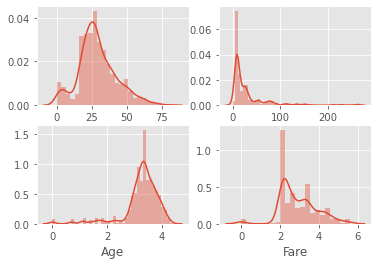

In [1810]:
fig, ax = plt.subplots(2,2)

sns.distplot(df_train["Age"], ax=ax[0,0])
sns.distplot(df_train["Fare"], ax=ax[0,1])
sns.distplot((df_train["Age"]+1).transform(np.log), ax=ax[1,0])
sns.distplot((df_train["Fare"]+1).transform(np.log), ax=ax[1,1])

print("Idade Std: %.2f" % df_train["Age"].std())
print("Idade Média: %.2f" % df_train["Age"].mean())
print("Log Idade Std: %.2f" % (df_train["Age"]+1).transform(np.log).std())
print("Log Idade Média: %.2f" % (df_train["Age"]+1).transform(np.log).mean())
print()
print("Preço Std: %.2f" % df_train["Fare"].std())
print("Preço Média: %.2f" % df_train["Fare"].mean())
print("Log Preço Std: %.2f" % (df_train["Fare"]+1).transform(np.log).std())
print("Log Preço Média: %.2f" % (df_train["Fare"]+1).transform(np.log).mean())

# Criação de modelos preditivos

In [1811]:
# Aqui vou deixar o Cabin e PassengerID de fora
X = df_train.drop(["Cabin", "PassengerId", "Survived"], axis=1).values
y = df_train["Survived"].values

In [1812]:
# Splitar os dados
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

Função que treinará, preverá e retornará a acurácia do modelo assim como o objeto

In [1813]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score, confusion_matrix

# Aplicar no Dataset de Teste

In [1814]:
# Esta função é para ser usada na parte abaixo (em que treino os modelos preditivos e prevejo os valores)
def createTestCSV(model, filename):

    # Guardar os ids dos passageiros
    passenger_id = df_test["PassengerId"].values

    # Aqui vou deixar o Cabin e o PassengerId de fora
    X = df_test.drop(["Cabin", "PassengerId"], axis=1).values
    
    pred = model.predict(X)
    
    # Guardar os resultados num .csv
    df = pd.DataFrame({"PassengerId": passenger_id, "Survived": pred})
    df.to_csv(filename, index=False)

## Regressão Logística

c:\users\tigax\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


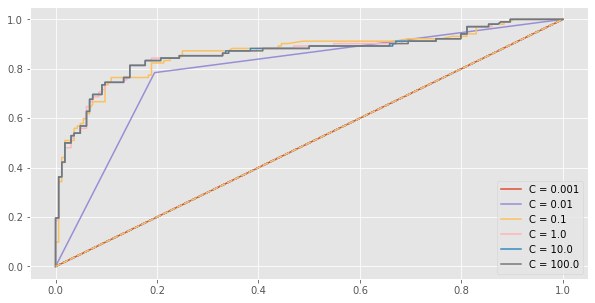

In [1815]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(10,5))

c_reg = [ 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

for c in c_reg:
    lr_clf = Pipeline(steps=[
        ("scale", StandardScaler()),
        #("lda", LDA()),
        ("lr", LogisticRegression(C=c, penalty="l1", solver="saga"))
    ])

    lr_clf.fit(X_train, y_train)

    pred = lr_clf.predict(X_test)
    
    # Plotar ROC Curve

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(0,2):
        # Calcular probabilidades de a classe ser 1 (sobreviveu)
        probs = lr_clf.predict_proba(X_test)[:, i]

        # Calcular o AUC Score
        roc_auc[i] = roc_auc_score(y_test, probs)

        # Calcular cada tpr e fpr para plotar a roc_curve
        fpr[i], tpr[i], _ = roc_curve(y_test, probs)
    
    plt.plot(fpr[1], tpr[1], label="C = "+str(c))
    plt.plot([0,1], [0,1], linestyle="--")
    plt.legend()

In [1816]:
lr_clf = Pipeline(steps=[
    ("scale", StandardScaler()),
    #("lda", LDA()),
    ("lr", LogisticRegression(C=0.1, penalty="l1", solver="saga"))
])

lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)

createTestCSV(lr_clf, "lr.csv")
print("Treino acurácia Regressão Logística (c/ hyperparams) = %.3f" % lr_clf.score(X_train, y_train))
print("Teste acurácia Regressão Logística (c/ hyperparams) = %.3f" % lr_clf.score(X_test, y_test))
print("\nMatriz de confusão (teste)\n",  confusion_matrix(y_test, pred))

Treino acurácia Regressão Logística (c/ hyperparams) = 0.832
Teste acurácia Regressão Logística (c/ hyperparams) = 0.835

Matriz de confusão (teste)
 [[144  20]
 [ 24  78]]


A regressão logística usa o método regularizador Lasso (L1) e o solver tem que ser o saga, porque o lbgfs só funciona com Ridge (L2). O porquê de usar Lasso é devido a ter várias features esparsas (onde grande parte dos valores são 0), devido a serem dummy variables.

In [1817]:
y_test[y_test==0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Naive Bayes Gaussiano (Normal)

In [1818]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

naive_clf = GaussianNB()

naive_clf.fit(X_train, y_train)

pred = naive_clf.predict(X_test)

# Gerar .csv final
createTestCSV(naive_clf, "gaussian_naive.csv")
print("Acurácia dos dados de treino = %.3f" % naive_clf.score(X_train, y_train))
print("Acurácia dos dados de teste = %.3f" % naive_clf.score(X_test, y_test))
print("Acurácia da previsão = %.3f" % accuracy_score(y_test, pred))

Acurácia dos dados de treino = 0.811
Acurácia dos dados de teste = 0.801
Acurácia da previsão = 0.801


## Naive Bayes Bernoulli

A razão de usar este é devido a termos vários dados binários que podem ser considerados vetores booleanos

In [1819]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

naiveb_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("estimator", BernoulliNB())
])

naiveb_clf.fit(X_train, y_train)

pred = naiveb_clf.predict(X_test)

# Gerar .csv final
createTestCSV(naiveb_clf, "bernoulli_naive.csv")
print("Acurácia dos dados de treino = %.3f" % naiveb_clf.score(X_train, y_train))
print("Acurácia dos dados de teste = %.3f" % naiveb_clf.score(X_test, y_test))
print("Acurácia da previsão = %.3f" % accuracy_score(y_test, pred))

Acurácia dos dados de treino = 0.789
Acurácia dos dados de teste = 0.782
Acurácia da previsão = 0.782


## KNN

Text(0, 0.5, 'Taxa de Erro')

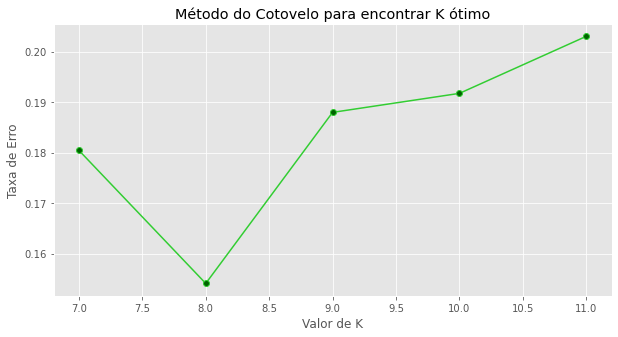

In [1820]:
from sklearn.neighbors import KNeighborsClassifier

## Vou aplicar o método do cotovelo para verificar o melhor valor de K

# Ficarão os erros de cada modelo com K diferente
error_rate = []

for i in range(7,12):
    
    clf_knn = Pipeline(steps=[
        ("scale", StandardScaler()),
        ("estimator", KNeighborsClassifier(n_neighbors=i))
    ])
    
    clf_knn.fit(X_train, y_train)
    
    pred = clf_knn.predict(X_test)
    
    error_rate.append( np.mean(pred != y_test) )


# Plotar o gráfico de cotovelo
plt.figure(figsize=(10,5))
plt.plot(range(7,12), error_rate, color="limegreen", marker='o', markerfacecolor="darkgreen")
plt.title("Método do Cotovelo para encontrar K ótimo")
plt.xlabel("Valor de K")
plt.ylabel("Taxa de Erro")

Vou apostar no K = 8, pois por várias vezes que rodei train_test_split, 8 pareceu-me um bom valor para K

In [1822]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA

clf_knn = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("pca", PCA(n_components=3)),
    ("clf", KNeighborsClassifier(n_neighbors=8, metric="euclidean"))
])

clf_knn.fit(X_train, y_train)

pred = clf_knn.predict(X_test)

# Gerar .csv final
createTestCSV(clf_knn, "knn.csv")
print("Acurácia dos dados de treino = %.3f" % clf_knn.score(X_train, y_train))
print("Acurácia dos dados de teste = %.3f" % clf_knn.score(X_test, y_test))
print("Acurácia da previsão = %.3f" % accuracy_score(y_test, pred))

Acurácia dos dados de treino = 0.837
Acurácia dos dados de teste = 0.820
Acurácia da previsão = 0.820


## Árvore de Decisão

In [1824]:
from sklearn.tree import DecisionTreeClassifier


clf_tree = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("clf", DecisionTreeClassifier(max_depth=5000, criterion="entropy"))
])

clf_tree.fit(X_train, y_train)

pred = clf_tree.predict(X_test)

# Gerar .csv final
createTestCSV(clf_tree, "tree.csv")
print("Acurácia dos dados de treino = %.3f" % clf_tree.score(X_train, y_train))
print("Acurácia dos dados de teste = %.3f" % clf_tree.score(X_test, y_test))
print("Acurácia da previsão = %.3f" % accuracy_score(y_test, pred))

Acurácia dos dados de treino = 0.989
Acurácia dos dados de teste = 0.793
Acurácia da previsão = 0.793
